In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
loan= pd.read_csv("../Data_science/loan.csv", low_memory= False)

In [3]:
loan.shape

(39717, 111)

In [4]:
loan.info(verbose= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    id                              int64  
 1    member_id                       int64  
 2    loan_amnt                       int64  
 3    funded_amnt                     int64  
 4    funded_amnt_inv                 float64
 5    term                            object 
 6    int_rate                        object 
 7    installment                     float64
 8    grade                           object 
 9    sub_grade                       object 
 10   emp_title                       object 
 11   emp_length                      object 
 12   home_ownership                  object 
 13   annual_inc                      float64
 14   verification_status             object 
 15   issue_d                         object 
 16   loan_status                     object 
 17   pymnt_plan

In [5]:
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [6]:
#deleating all colums with null values
missing_value = loan.isnull().sum()
loan_cleaned = loan.drop(columns= missing_value[missing_value == loan.shape[0]].index )
loan_cleaned.shape

(39717, 57)

In [7]:
#removing % signs from data eg interst rate
loan_cleaned['int_rate']=loan_cleaned['int_rate'].str.rstrip('%').astype(float)/100.0
loan_cleaned['revol_util']=loan_cleaned['revol_util'].str.rstrip('%').astype(float)/100.0

In [8]:
loan_cleaned.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12942
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [9]:
#removing non revelant colums
loan_cleaned = loan_cleaned.drop(columns= ['next_pymnt_d','mths_since_last_record','mths_since_last_delinq','desc'])

In [10]:
loan_cleaned['emp_title'].mode()[0]

'US Army'

In [11]:
# imputing missing values 
# replacing categorical missing values with mode and for numerical values mean and median
loan_cleaned['emp_title'].fillna(loan_cleaned['emp_title'].mode()[0])
loan_cleaned['title'].fillna(loan_cleaned['title'].mode()[0])


0                         Computer
1                             bike
2             real estate business
3                         personel
4                         Personal
                   ...            
39712             Home Improvement
39713    Retiring credit card debt
39714       MBA Loan Consolidation
39715                     JAL Loan
39716           Consolidation Loan
Name: title, Length: 39717, dtype: object

In [12]:
loan_cleaned.isnull().sum()

id                               0
member_id                        0
loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
term                             0
int_rate                         0
installment                      0
grade                            0
sub_grade                        0
emp_title                     2459
emp_length                    1075
home_ownership                   0
annual_inc                       0
verification_status              0
issue_d                          0
loan_status                      0
pymnt_plan                       0
url                              0
purpose                          0
title                           11
zip_code                         0
addr_state                       0
dti                              0
delinq_2yrs                      0
earliest_cr_line                 0
inq_last_6mths                   0
open_acc                         0
pub_rec             

In [13]:
# ?replacing numerical data with median bcos no idea of outliers 
# if big differance in mean and median do median for safe

num_columns_to_impute = ['pub_rec_bankruptcies', 'revol_util', 'tax_liens', 'collections_12_mths_ex_med', 'chargeoff_within_12_mths']
for col in num_columns_to_impute:
    loan_cleaned[col].fillna(loan_cleaned[col].median(), inplace=True)

# loan_cleaned = loan_cleaned.drop(columns=['mths_since_last_record', 'mths_since_last_delinq'])

loan_cleaned['last_pymnt_d'].fillna(loan_cleaned['last_pymnt_d'].mode()[0], inplace=True)
loan_cleaned['last_credit_pull_d'].fillna(loan_cleaned['last_credit_pull_d'].mode()[0], inplace=True)


C:\Users\shiva\AppData\Local\Temp\ipykernel_4256\2796848687.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan_cleaned[col].fillna(loan_cleaned[col].median(), inplace=True)
C:\Users\shiva\AppData\Local\Temp\ipykernel_4256\2796848687.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as

In [14]:
# Convert 'term' to integer
loan_cleaned['term'] = loan_cleaned['term'].str.extract('(\d+)').astype('int')

# Convert 'emp_length' to numeric
loan_cleaned['emp_length'] = loan_cleaned['emp_length'].str.extract('(\d+)').fillna(0).astype('int')

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
C:\Users\shiva\AppData\Local\Temp\ipykernel_4256\3981008613.py:2: SyntaxWarning: invalid escape sequence '\d'
  loan_cleaned['term'] = loan_cleaned['term'].str.extract('(\d+)').astype('int')
C:\Users\shiva\AppData\Local\Temp\ipykernel_4256\3981008613.py:5: SyntaxWarning: invalid escape sequence '\d'
  loan_cleaned['emp_length'] = loan_cleaned['emp_length'].str.extract('(\d+)').fillna(0).astype('int')


In [15]:
loan_cleaned.duplicated().sum()
loan_cleaned.isnull().sum()

id                               0
member_id                        0
loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
term                             0
int_rate                         0
installment                      0
grade                            0
sub_grade                        0
emp_title                     2459
emp_length                       0
home_ownership                   0
annual_inc                       0
verification_status              0
issue_d                          0
loan_status                      0
pymnt_plan                       0
url                              0
purpose                          0
title                           11
zip_code                         0
addr_state                       0
dti                              0
delinq_2yrs                      0
earliest_cr_line                 0
inq_last_6mths                   0
open_acc                         0
pub_rec             

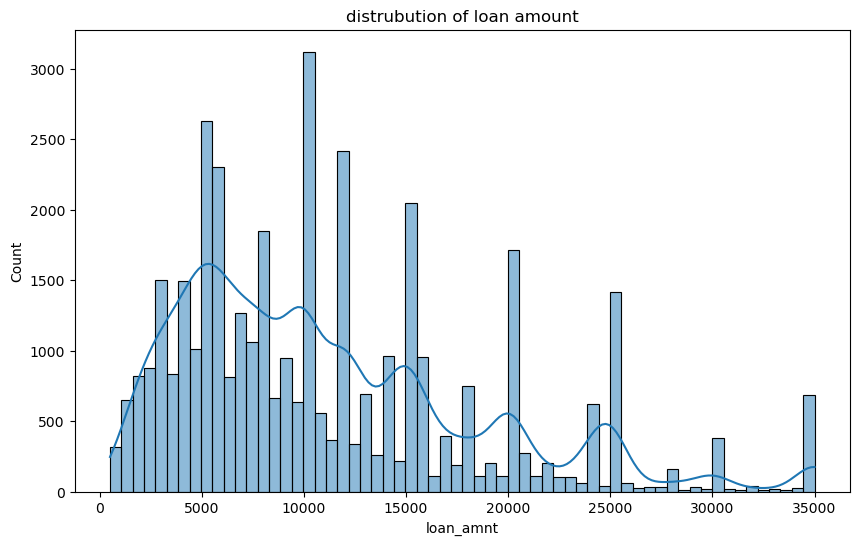

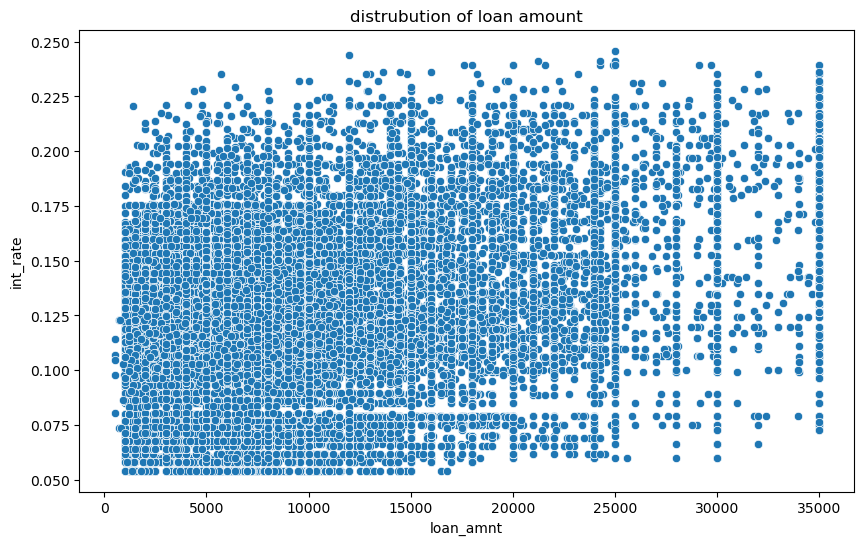

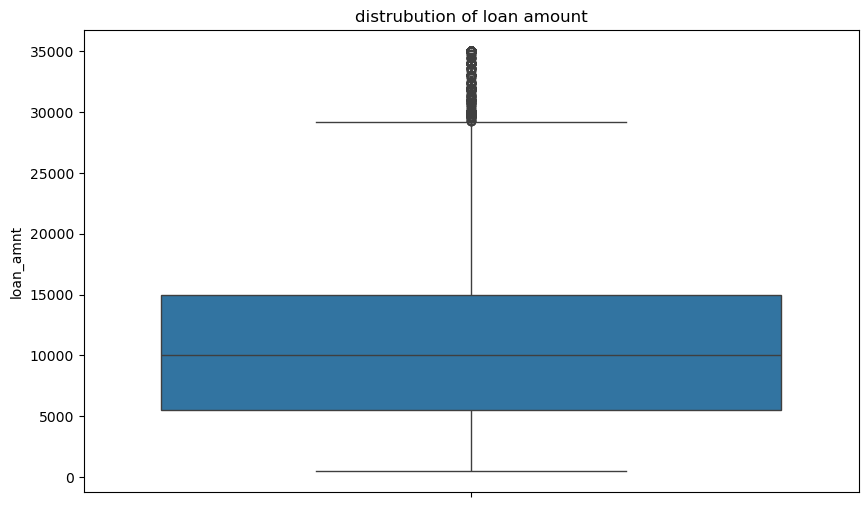

In [16]:
# explotry data analysis (EDA)


# histogram is used of univerant data eg 1 columabs

plt.figure(figsize=(10,6))
sns.histplot(loan_cleaned['loan_amnt'],kde =True)
plt.title("distrubution of loan amount")
plt.show()

# bivarient analysis
plt.figure(figsize=(10,6))
sns.scatterplot(x='loan_amnt',y='int_rate', data= loan_cleaned)
plt.title("distrubution of loan amount")
plt.show()


plt.figure(figsize=(10,6))
sns.boxplot(loan_cleaned['loan_amnt'])
plt.title("distrubution of loan amount")
plt.show()

<Axes: xlabel='int_rate', ylabel='Density'>

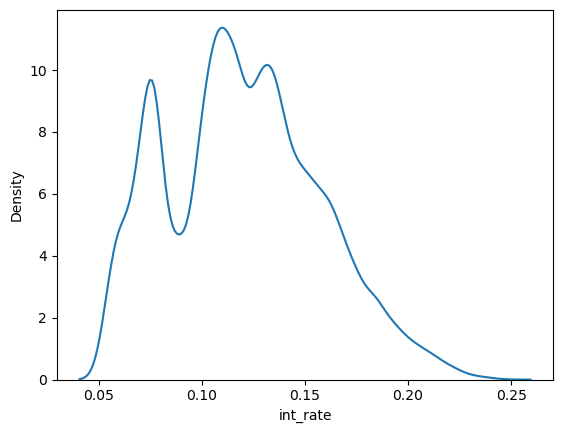

In [17]:
sns.kdeplot(x='int_rate', data=loan_cleaned)

In [18]:
df= loan_cleaned.select_dtypes(include=("number"))
df.corr()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
id,1.000000,0.993650,0.141919,0.152286,0.249547,0.218589,0.078831,0.086587,0.094812,0.008731,...,0.033426,-0.013359,0.122365,NaN,NaN,NaN,NaN,NaN,-0.000569,NaN
member_id,0.993650,1.000000,0.140710,0.150322,0.257887,0.234265,0.074725,0.081025,0.098221,0.009380,...,0.031565,-0.015155,0.123627,NaN,NaN,NaN,NaN,NaN,0.000809,NaN
loan_amnt,0.141919,0.140710,1.000000,0.981578,0.940034,0.361036,0.309415,0.930288,0.161924,0.271149,...,0.135446,0.072853,0.448742,NaN,NaN,NaN,NaN,NaN,-0.036284,NaN
funded_amnt,0.152286,0.150322,0.981578,1.000000,0.958422,0.340510,0.312619,0.956159,0.161475,0.266965,...,0.136284,0.074676,0.453133,NaN,NaN,NaN,NaN,NaN,-0.037636,NaN
funded_amnt_inv,0.249547,0.257887,0.940034,0.958422,1.000000,0.360747,0.306657,0.905039,0.169808,0.254375,...,0.123759,0.060358,0.442604,NaN,NaN,NaN,NaN,NaN,-0.037982,NaN
term,0.218589,0.234265,0.361036,0.340510,0.360747,1.000000,0.451699,0.101973,0.110473,0.046675,...,0.101351,0.031731,0.232915,NaN,NaN,NaN,NaN,NaN,0.014207,NaN
int_rate,0.078831,0.074725,0.309415,0.312619,0.306657,0.451699,1.000000,0.282703,0.017516,0.053185,...,0.122259,0.066380,0.157775,NaN,NaN,NaN,NaN,NaN,0.083579,NaN
installment,0.086587,0.081025,0.930288,0.956159,0.905039,0.101973,0.282703,1.000000,0.134766,0.270874,...,0.118152,0.075467,0.401688,NaN,NaN,NaN,NaN,NaN,-0.033746,NaN
emp_length,0.094812,0.098221,0.161924,0.161475,0.169808,0.110473,0.017516,0.134766,1.000000,0.122239,...,0.024922,0.006479,0.081967,NaN,NaN,NaN,NaN,NaN,0.045923,NaN
annual_inc,0.008731,0.009380,0.271149,0.266965,0.254375,0.046675,0.053185,0.270874,0.122239,1.000000,...,0.021589,0.015604,0.140401,NaN,NaN,NaN,NaN,NaN,-0.016514,NaN


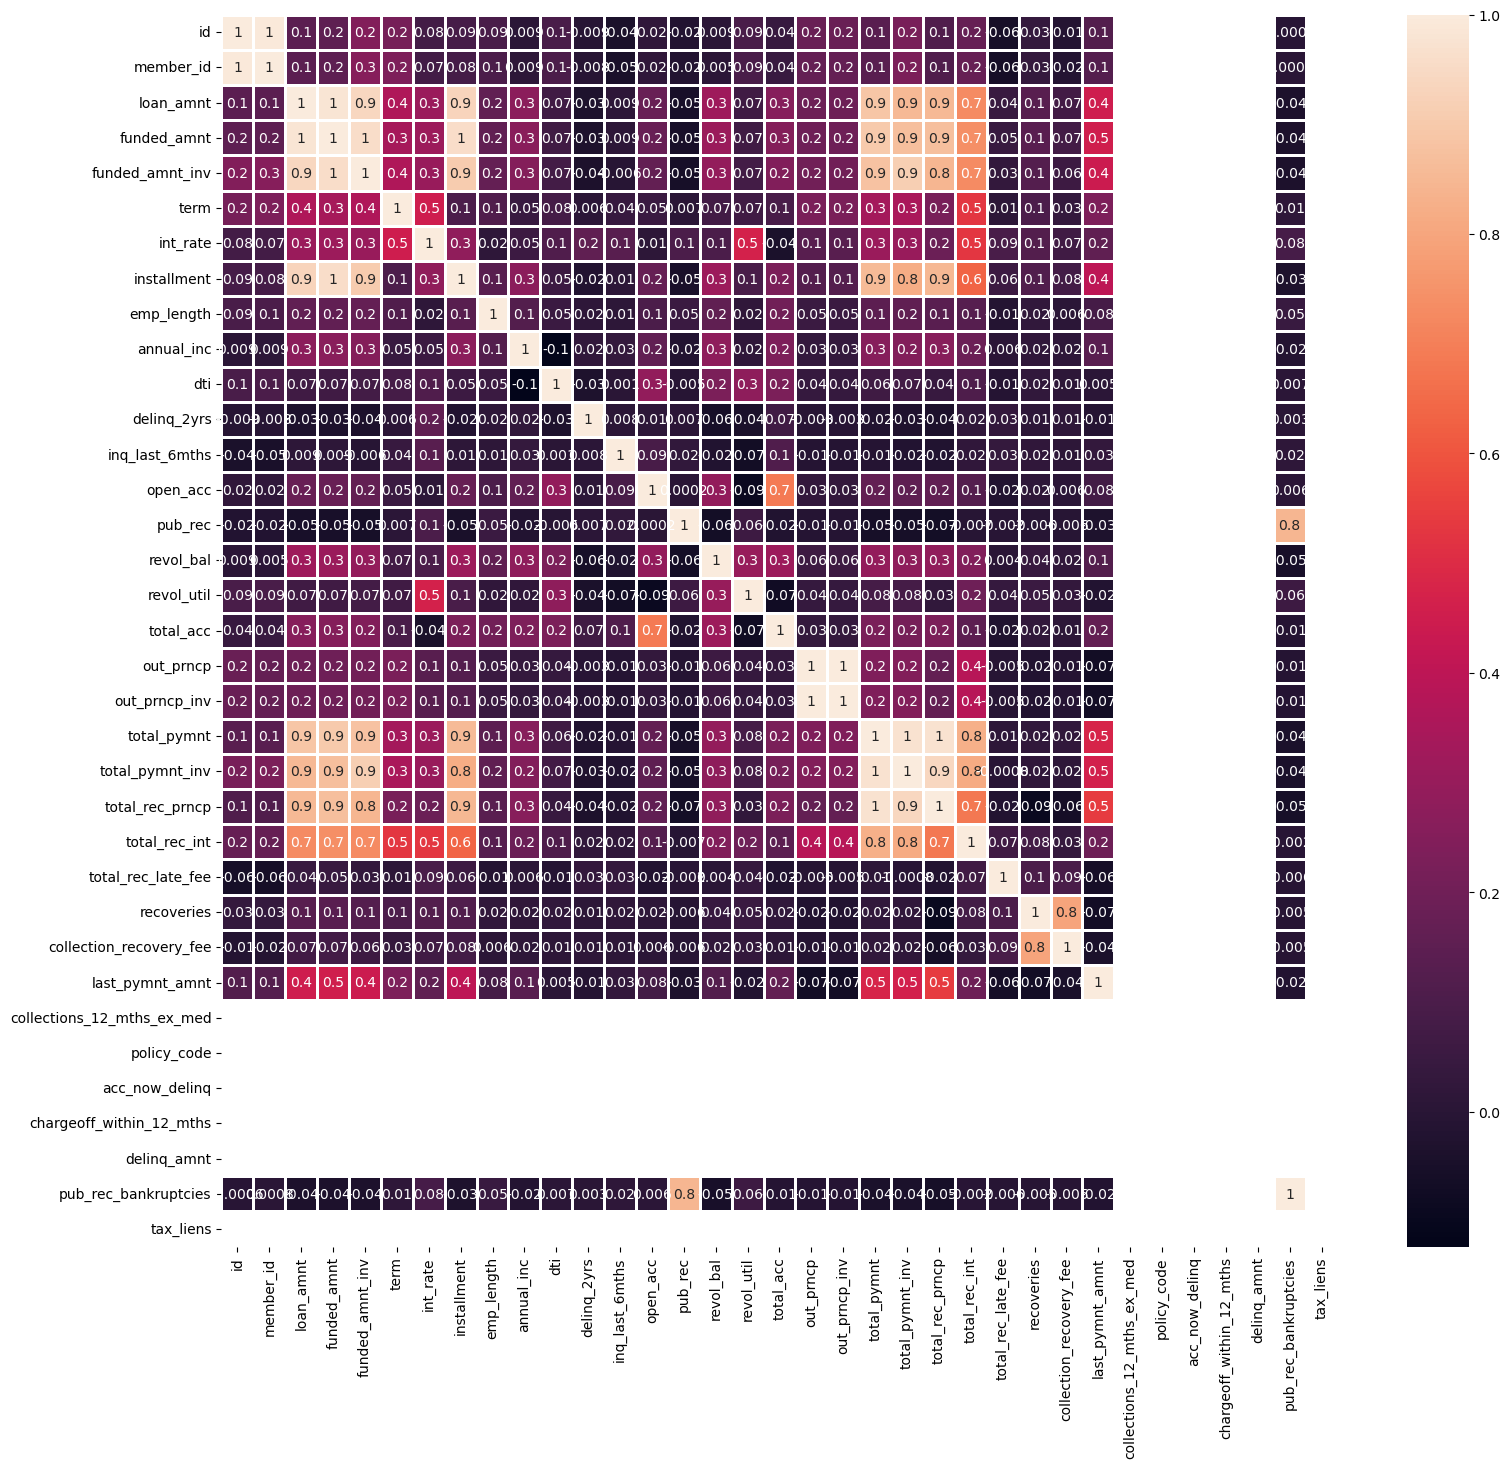

In [41]:
plt.figure(figsize=(18,16))
sns.heatmap(df.corr(),annot= True ,linewidths= 0.9,fmt=".1g")
plt.show()